In [ ]:
from read_data import *
from hyper import *
from alignment import *
from datasets.preprecossing import *

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


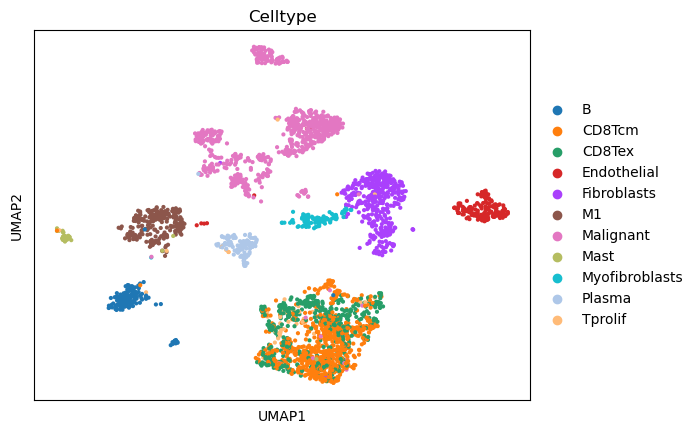

In [176]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_EMTAB8107_CellMetainfo_table.tsv",sep="\t")
# cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
# adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])

# preprocessing()
adata2 = sc.pp.subsample(adata1,fraction = 0.1)
adata2
sc.pl.umap(adata1, color="Celltype")

In [ ]:
adata1.obs

In [ ]:
from scipy.spatial import distance_matrix

matrixs = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix1 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']==i].values))
    matrixs.append(matrix1)
    
list_matrix = []
for m in matrixs:
    list_matrix.append(m.values.reshape(-1).tolist())


In [ ]:
from scipy.spatial import distance_matrix

matrixs2 = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix2 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']!=i].values))
    matrixs2.append(matrix2)
    
list_matrix2 = []
for m in matrixs2:
    list_matrix2.append(m.values.reshape(-1).tolist())
list_matrix2

In [ ]:
from itertools import chain 
list(chain(*list_matrix)) 

In [ ]:
np.array(list_matrix)

In [182]:
np.array(list(chain(*list_matrix2))).min()

5.617839049297416

<AxesSubplot: ylabel='Density'>

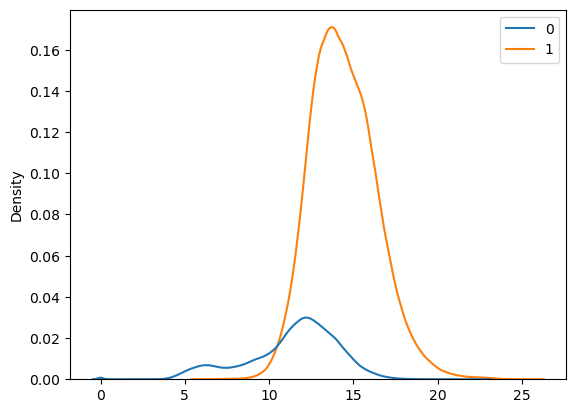

In [143]:
import seaborn as sns
sns.kdeplot([list(chain(*list_matrix)),list(chain(*list_matrix2)) ])

In [172]:
from scipy.spatial import KDTree

r=10
now = adata1.to_df().values
labels = adata1.obs['Celltype'].tolist();
total = 0;
tree=  KDTree(now)
for i in range(1000):
    rnd = np.random.randint(now.shape[0], size=1)
    rand_choice = now[rnd, :].reshape(-1)
    indices = tree.query_ball_point(rand_choice,r)
    for l in indices:
        if(labels[int(rnd)] != labels[l]):
            total+=1
    # break
# rand_choice.shape
# total,len(indices)
print(total/1000)

12.222


In [175]:
from scipy.spatial import KDTree

r=10
now = adata1.to_df().values
labels = adata1.obs['Celltype'].tolist();
total = 0;
tree=  KDTree(now)
for i in range(10000):
    rnd = np.random.randint(now.shape[0], size=1)
    rand_choice = now[rnd, :].reshape(-1)
    indices = tree.query_ball_point(rand_choice,r)
    for l in indices:
        if(labels[int(rnd)] != labels[l]):
            total+=1
    # break
# rand_choice.shape
# total,len(indices)
print(total/10000)

13.2623


In [ ]:
import seaborn as sns
sns.kdeplot([np.array(list_matrix).reshape(1,-1).tolist(),np.array(list_matrix2).reshape(1,-1).tolist()])

In [ ]:
contain.T

In [ ]:
import seaborn as sns
sns.kdeplot(contain.T)

In [ ]:
matrixs[0]

In [ ]:
adata1.to_df()[adata1.obs['Celltype']=='B'].values

In [ ]:
adata1.obs[adata1.obs['Celltype']=='B'].index.tolist()[0]

In [ ]:
datas = pd.read_csv("./datas/data1/data_cell.csv").set_index("Unnamed: 0")
datas

In [ ]:
datas[list(adata1.obs[adata1.obs['Celltype']=='B'].index)]

In [ ]:
datas[adata1.obs[adata1.obs['Celltype']=='B'].index.tolist()]

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


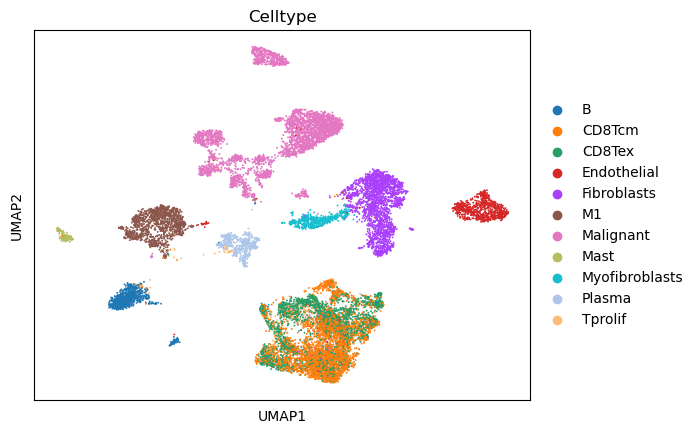

B
CD8Tcm
CD8Tex
Endothelial
Fibroblasts
Malignant
Mast
M1
Myofibroblasts
Plasma
Tprolif
B
CD8Tcm
CD8Tex
Endothelial
Fibroblasts
Malignant
Mast
M1
Myofibroblasts
Plasma
Tprolif


: 

: 

In [183]:
adata1 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_expression_processed.h5ad") 
# adata2 = sc.read("../../../capital/docs/tutorials/BRCA_EMTAB8107_expression_processed.h5ad")
cell_type1 = pd.read_csv("../../../capital/docs/tutorials/BRCA_EMTAB8107_CellMetainfo_table.tsv",sep="\t")
# cell_type2 = pd.read_csv("../../../capital/docs/tutorials/BRCA_GSE114727_inDrop_CellMetainfo_table.tsv",sep='\t');
adata1.obs.loc[list(cell_type1['Cell']), 'Celltype'] = list(cell_type1['Celltype (minor-lineage)'])
# adata2.obs.loc[list(cell_type2['Cell']), 'Celltype'] = list(cell_type2['Celltype (minor-lineage)'])

# preprocessing()
adata2 = sc.pp.subsample(adata1,fraction = 0.5)
adata2
sc.pl.umap(adata1, color="Celltype")
from scipy.spatial import distance_matrix

matrixs = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix1 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']==i].values))
    matrixs.append(matrix1)
    
list_matrix = []
for m in matrixs:
    list_matrix.append(m.values.reshape(-1).tolist())
from scipy.spatial import distance_matrix

matrixs2 = []
for i in cell_type1['Celltype (minor-lineage)'].unique():
    print(i)
    matrix2 = pd.DataFrame(distance_matrix(adata1.to_df()[adata1.obs['Celltype']==i].values,adata1.to_df()[adata1.obs['Celltype']!=i].values))
    matrixs2.append(matrix2)
    
list_matrix2 = []
for m in matrixs2:
    list_matrix2.append(m.values.reshape(-1).tolist())
list_matrix2
import seaborn as sns
sns.kdeplot([list(chain(*list_matrix)),list(chain(*list_matrix2)) ])